## Monty Hall Problem

<img src="monty.png">

<center>
Probabilidade da Escolha do Candidato: P(C)

| C | 0    | 1    | 2    |
|---|------|------|------|
| P | 0.33 | 0.33 | 0.33 |

Probabilidade do Prêmio Estar em uma porta: P(P)

| P | 0    | 1    | 2    |
|---|------|------|------|
| P | 0.33 | 0.33 | 0.33 |

Probabilidade de Abrir a Porta baseado de onde o prêmio está: P(A| P, C)

| Prêmio | Seleção | P(P1) | P(P2) | P(P3) |
|--------|---------|-------|-------|-------|
| 1      | 1       | 0     | 0.5   | 0.5   |
| 1      | 2       | 0     | 0     | 1     |
| 1      | 3       | 0     | 1     | 0     |
| 2      | 1       | 0     | 0     | 1     |
| 2      | 2       | 0.5   | 0     | 0.5   |
| 2      | 3       | 1     | 0     | 0     |
| 3      | 1       | 0     | 1     | 0     |
| 3      | 2       | 1     | 0     | 0     |
| 3      | 3       | 0.5   | 0.5   | 0     |


Modelo da Rede Baysiana

<img src="bayesian.png">

</center>

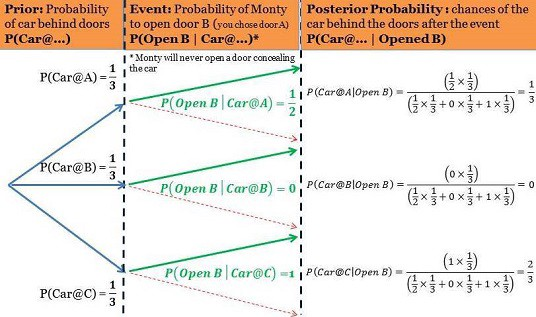

In [34]:
Image("monty hall.jpeg")

In [62]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

model = BayesianModel([('C', 'A'), ('P', 'A')])

cpd_c = TabularCPD('C', 3, [[0.33, 0.33, 0.33]])
cpd_p = TabularCPD('P', 3, [[0.33, 0.33, 0.33]])
cpd_h = TabularCPD('A', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['C', 'P'], evidence_card=[3, 3])

model.add_cpds(cpd_c, cpd_p, cpd_h)

model.get_cpds()

model.check_model()

from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

print("Selecionando a porta 1: \n")
posterior_p = infer.query(['P'], evidence={'C': 1, 'A': 2})
print(posterior_p)
print()
posterior_p = infer.query(['P'], evidence={'C': 1, 'A': 0})
print(posterior_p)

print()

print("Selecionando a porta 2: \n")
posterior_p = infer.query(['P'], evidence={'C': 2, 'A': 0})
print(posterior_p)
print()
posterior_p = infer.query(['P'], evidence={'C': 2, 'A': 1})
print(posterior_p)

print()

print("Selecionando a porta 0: \n")
posterior_p = infer.query(['P'], evidence={'C': 0, 'A': 0})
print(posterior_p)
print()
posterior_p = infer.query(['P'], evidence={'C': 0, 'A': 1})
print(posterior_p)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
/home/guiraiol/anaconda3/envs/idp/lib/python3.6/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:377: RuntimeWarning: invalid value encountered in true_divide
  [ 8,  9],
0it [00:00, ?it/s]

Selecionando a porta 1: 

+-----+----------+
| P   |   phi(P) |
+=====+==========+
| P_0 |   0.6667 |
+-----+----------+
| P_1 |   0.3333 |
+-----+----------+
| P_2 |   0.0000 |
+-----+----------+

+-----+----------+
| P   |   phi(P) |
+=====+==========+
| P_0 |   0.0000 |
+-----+----------+
| P_1 |   0.3333 |
+-----+----------+
| P_2 |   0.6667 |
+-----+----------+

Selecionando a porta 2: 

+-----+----------+
| P   |   phi(P) |
+=====+==========+
| P_0 |   0.0000 |
+-----+----------+
| P_1 |   0.6667 |
+-----+----------+
| P_2 |   0.3333 |
+-----+----------+

+-----+----------+
| P   |   phi(P) |
+=====+==========+
| P_0 |   0.6667 |
+-----+----------+
| P_1 |   0.0000 |
+-----+----------+
| P_2 |   0.3333 |
+-----+----------+

Selecionando a porta 0: 

+-----+----------+
| P   |   phi(P) |
+=====+==========+
| P_0 |      nan |
+-----+----------+
| P_1 |      nan |
+-----+----------+
| P_2 |      nan |
+-----+----------+

+-----+----------+
| P   |   phi(P) |
+=====+==========+
| P_0